# **Simple Linear Regression**
In this regression task we have to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.<br> This is a simple **linear regression** task as it involves just **two variables**.

In [2]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url = "http://bit.ly/w-data" 

#storing the data and making a dataset
s_data = pd.read_csv(url)
print("Data imported successfully")
s_data.head(10) #Printing top 10 rows of dataset

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Plotting our data points on a 2-D graph to manually interpret any relationship that it can inherit.

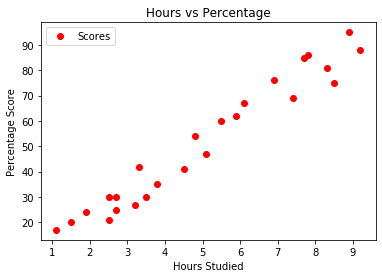

In [4]:
# Plotting the distribution of scores
s_data.plot(x='Hours', y='Scores', style='ro')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

### **Segregating the data into inputs and labels**

In [5]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

### **Splitting the data into train sets and test sets**

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

### **Training the Algorithm**

In [7]:
from sklearn.linear_model import LinearRegression  
lin_reg = LinearRegression()  
lin_reg.fit(X_train, y_train) 
print("Training complete.")

Training complete.


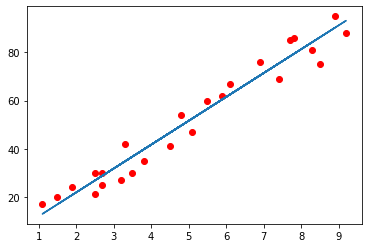

In [8]:
# Plotting the regression line
line = (lin_reg.coef_)*X + lin_reg.intercept_

# Plotting for the test data
plt.scatter(X, y, color="r")
plt.plot(X, line);
plt.show()

### **Making Predictions**

In [9]:
print("Testing Data")
print(X_test) # Testing data - In Hours
y_pred = lin_reg.predict(X_test) # Predicting the scores

Testing Data
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# **Question**
### What will be predicted score if a student study for 9.25 hrs in a day?

In [11]:
hours = np.array([9.25])
print(type(hours))
own_pred = lin_reg.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

<class 'numpy.ndarray'>
No of Hours = [9.25]
Predicted Score = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.

In [12]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975
